**AUTHOR: CHANDOLU SRAVYA**


**GRIP @ The Sparks Foundation**


**Data Science and Business Analyst Intern**

**Task1:** **PREDICTION USING SUPERVISED MACHINE LEARNING ( LINEAR REGRESSION)**

In this task,we have to predict percentage of a student based on the number of study hours.

In [3]:
#Importing important libraries-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
#importing Dataset-
path =  "http://bit.ly/w-data"
Data = pd.read_csv(path)
print("Data is imported")
Data

Data is imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Exploring Data**

In [7]:
#Now printing the first 5 records
print(Data.shape)
Data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
#Now printing the last 5 records
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
#describe() method is used to show percentiles,mean,std,max,count of the given dataset.
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# printing the full summary of the dataframe .
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **To check whether duplicates are present**

In [11]:
rmv_dup=Data.duplicated()
print('No. of Duplicates:'+ str(rmv_dup.sum))

No. of Duplicates:<bound method Series.sum of 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool>


# **Exploratory Data Analysis**

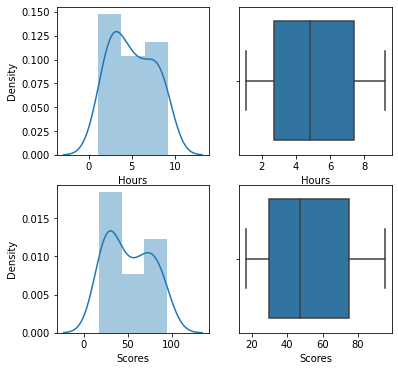

In [17]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(6,6)

a=sns.distplot(Data['Hours'], ax=axes[0][0])
a=sns.boxplot(Data['Hours'], orient='v',ax=axes[0][1])

a=sns.distplot(Data['Scores'], ax=axes[1][0])
a=sns.boxplot(Data['Scores'], orient='v',ax=axes[1][1])

plt.show()

# **Data Visualization**

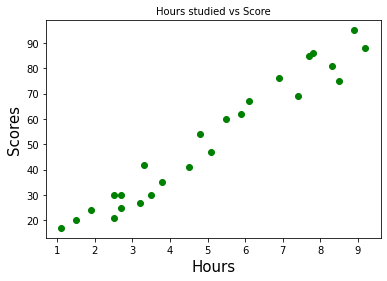

In [19]:
##ploting Scatter plot
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(Data.Hours,Data.Scores,color='green')
plt.show()


**(The above "SCATTER PLOT" indicates a positive linear relationship between hours studied and scores.;which means if no of hours you study is more then there is a chance of high scoring)**

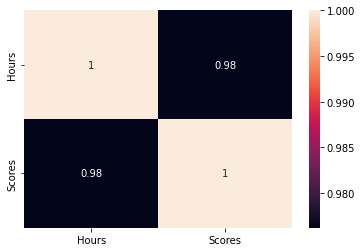

In [23]:
#Checking correlation

sns.heatmap(Data.corr(),annot=True)
plt.show()

# **LINEAR REGRESSION**

In [20]:
X = Data.iloc[:,:-1].values
Y = Data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [21]:
Y


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

#                **Preparing Data and splitting into train and test sets.**

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [25]:
## We Split Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


# **Training the model**

In [26]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [27]:
#Fitting Training Data
linreg.fit(X_train,Y_train)
print("Training is finished")

Training is finished


In [28]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## B0 is Intercept & Slope of the line is B1.,"

B0 = 2.018160041434662 
B1 = [9.91065648]


# **Plotting the regression line**

In [29]:
#plotting the REGRESSION LINE---
Y0 = linreg.intercept_ + linreg.coef_*X_train

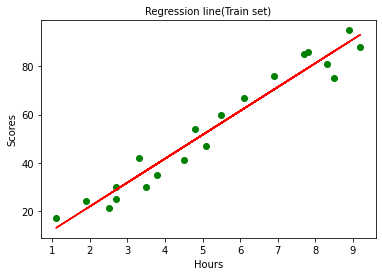

In [30]:
#plotting on train data
plt.scatter(X_train,Y_train,color='green')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

# **Test Data**

In [31]:
Y_pred=linreg.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [32]:
#now print the Y_test.
Y_test

array([20, 27, 69, 30, 62])

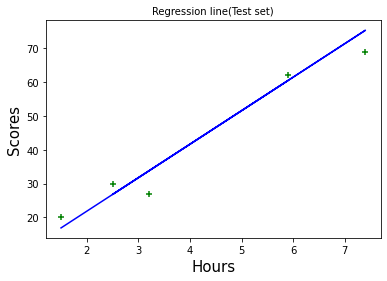

In [33]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='blue')
plt.scatter(X_test,Y_test,color='green',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()


# **Comparing actual vs predicted scores**

In [34]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Accuracy of model**

In [38]:
#Checking accuracy
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)#Goodness of fit Test

0.9454906892105354

**(Above 94% percentage indicates that above fitted Model is a GOOD MODEL)**

# **Model Evaluation (Predicting the error)**

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  2.0454485813637513


### **(Since Mean Absolute Error is less and since we have good R-square value, we can say that the model doing great linear model)**

# **Predicting the score**

In [42]:
# predicting the scores
y_pred = linreg.predict(X_test) 
print("y_pred :")
print(y_pred)

y_pred :
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [44]:
# Actual vs Predicted comparsion
ac_prediction=pd.DataFrame({'Actual' : Y_test ,'Predicted':y_pred})
ac_prediction

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [45]:
#Predicting if he/she studies for 9.25 hours per day
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


# **CONCLUSION**

**From the above result we can say that if a studied for 9.25 hrs then student will secured 93.69 MARKS (predicted score)**

# **END**